**DATA INITIALIZATION**


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('drug_dosage.csv')

# Basic inspection
print("--- Info ---")
df.info()
print("\n--- Head ---")
print(df.head())
print("\n--- Summary Statistics ---")
print(df.describe(include='all'))
print("\n--- Missing Values ---")
print(df.isnull().sum())

--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   weight_kg                944 non-null    float64
 1   metabolism_rate          947 non-null    float64
 2   age                      956 non-null    float64
 3   gender                   947 non-null    object 
 4   liver_function           944 non-null    object 
 5   kidney_function          952 non-null    object 
 6   drug_type                955 non-null    object 
 7   administration_route     950 non-null    object 
 8   concurrent_medications   954 non-null    float64
 9   genetic_marker           947 non-null    object 
 10  food_interaction         623 non-null    object 
 11  treatment_duration_days  949 non-null    float64
 12  optimal_dosage_mg        949 non-null    float64
dtypes: float64(6), object(7)
memory usage: 101.7+ KB

--- Head ---
   

### **DESCRIPTIVE INFORMATION IN THE GIVEN DATA**

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('drug_dosage.csv')

# 1. General Info: Data types and memory usage
print("--- Dataset Structure and Info ---")
print(df.info())

# 2. Numerical Descriptive Statistics: Mean, Median (50%), SD, etc.
print("\n--- Numerical Summary Statistics ---")
print(df.describe())

# 3. Categorical Descriptive Statistics: Frequency and Unique counts
print("\n--- Categorical Summary Statistics ---")
print(df.describe(include=['object']))

# 4. Data Quality Check: Missing values
print("\n--- Missing Values Summary ---")
print(df.isnull().sum())

# 5. Cardinality: Number of unique values per categorical feature
print("\n--- Categorical Cardinality ---")
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    print(f"{col}: {df[col].nunique()} unique categories")

--- Dataset Structure and Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   weight_kg                944 non-null    float64
 1   metabolism_rate          947 non-null    float64
 2   age                      956 non-null    float64
 3   gender                   947 non-null    object 
 4   liver_function           944 non-null    object 
 5   kidney_function          952 non-null    object 
 6   drug_type                955 non-null    object 
 7   administration_route     950 non-null    object 
 8   concurrent_medications   954 non-null    float64
 9   genetic_marker           947 non-null    object 
 10  food_interaction         623 non-null    object 
 11  treatment_duration_days  949 non-null    float64
 12  optimal_dosage_mg        949 non-null    float64
dtypes: float64(6), object(7)
memory usage: 101.7

## DATA MANIPULATION TECHNIQUES USED

**Median Imputation:** Used for weight_kg, age, and metabolism_rate. This ensures that missing records do not lead to data loss while maintaining the central tendency of the patient population.

**Constant Imputation ('Unknown'):** Applied specifically to food_interaction because the significant amount of missing data (over 30%) might itself be an informative signal (e.g., the interaction is not applicable for that drug).

**Label Encoding:** Applied to gender, liver_function, kidney_function, and drug_type to translate clinical categories into a mathematical format.

Standardization (Z-score Scaling):This prevents variables with larger ranges (like weight_kg) from dominating the model over variables with smaller ranges (like metabolism_rate), ensuring fair weightage during analysis.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1. Load the dataset
df = pd.read_csv('drug_dosage.csv')

# --- 2. Handling Missing Values (Imputation) ---
# For numerical columns, we use the median to fill gaps to remain robust against outliers
numerical_cols = df.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())

# For categorical columns, we use the mode (most frequent value)
# For 'food_interaction', we create an 'Unknown' category due to the high missing count
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if col == 'food_interaction':
        df[col] = df[col].fillna('Unknown')
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

# --- 3. Categorical Encoding ---
# Machine learning models require numerical input.
# Label Encoding converts text labels (e.g., 'Male', 'Female') into integers (0, 1).
df_manipulated = df.copy()
le = LabelEncoder()
for col in categorical_cols:
    df_manipulated[col] = le.fit_transform(df_manipulated[col])

# --- 4. Feature Scaling (Standardization) ---
# Since age, weight, and metabolism rate have different units/scales,
# we standardize them to have a mean of 0 and a standard deviation of 1.
scaler = StandardScaler()
features_to_scale = ['weight_kg', 'metabolism_rate', 'age', 'concurrent_medications', 'treatment_duration_days']
df_manipulated[features_to_scale] = scaler.fit_transform(df_manipulated[features_to_scale])

# Save the manipulated dataset
df_manipulated.to_csv('manipulated_drug_dosage.csv', index=False)

print("Data manipulation complete. Missing values removed and features scaled.")

Data manipulation complete. Missing values removed and features scaled.


# **GRAPHS**

/tmp/ipython-input-535831030.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='drug_type', y='optimal_dosage_mg', palette='Set2', order=order)


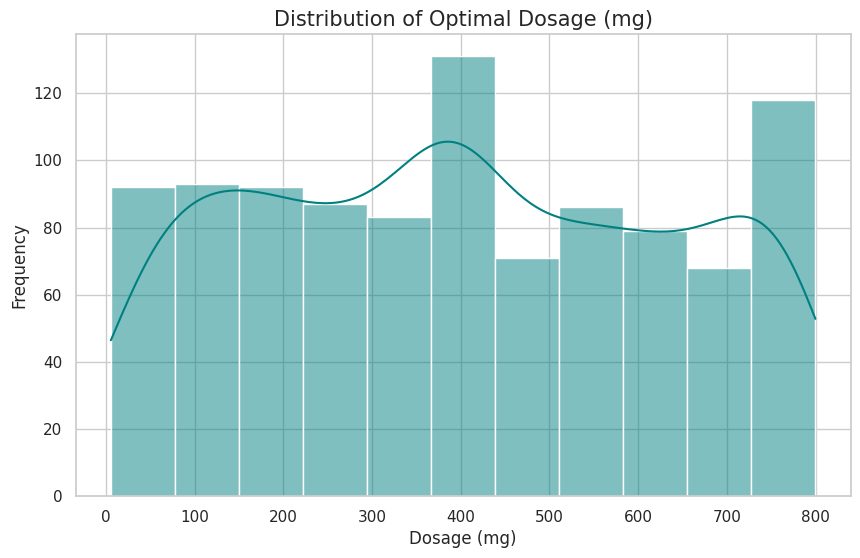

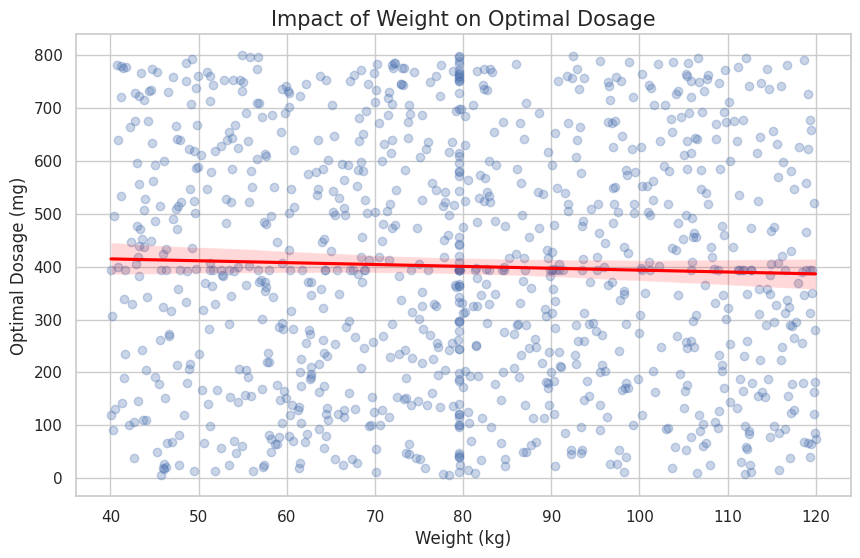

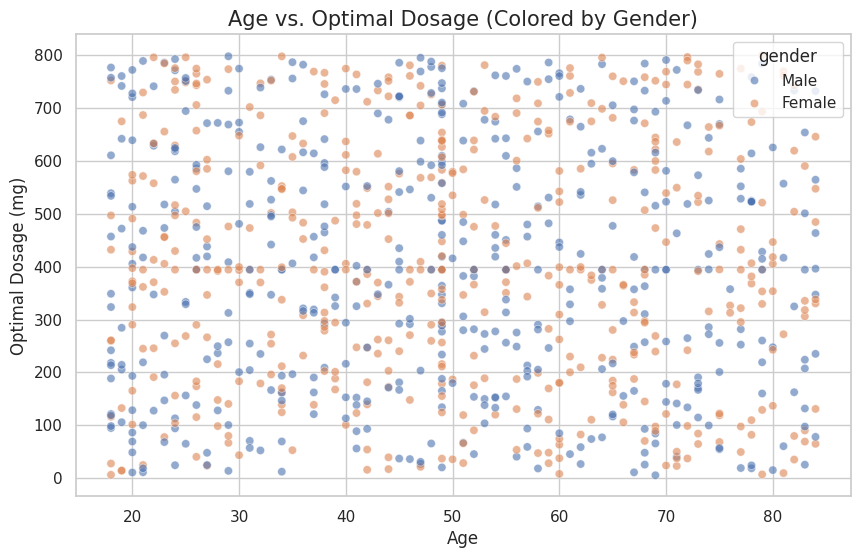

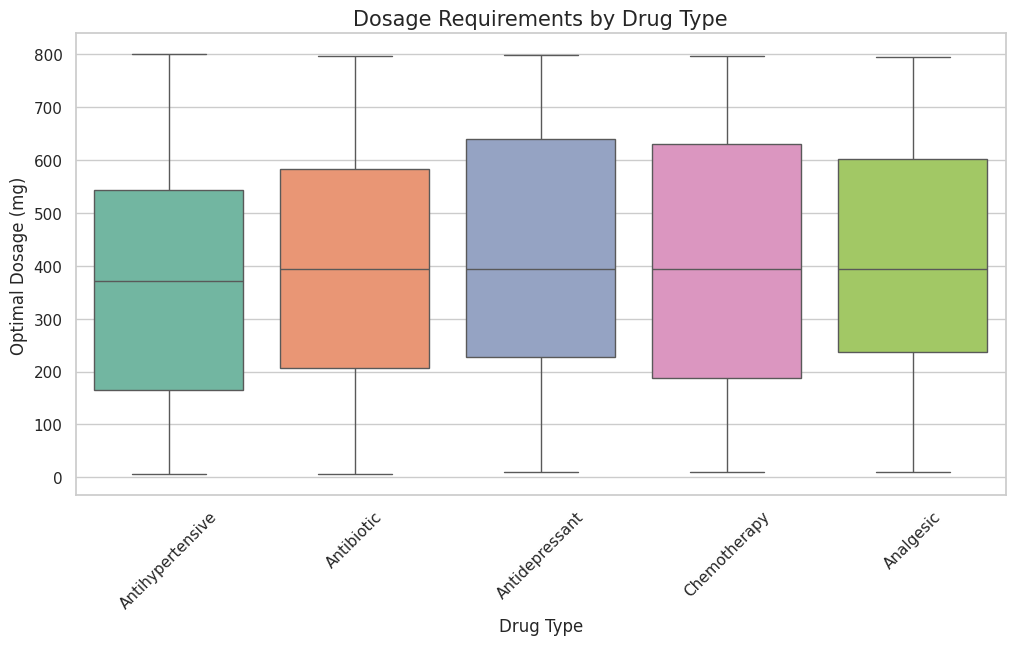

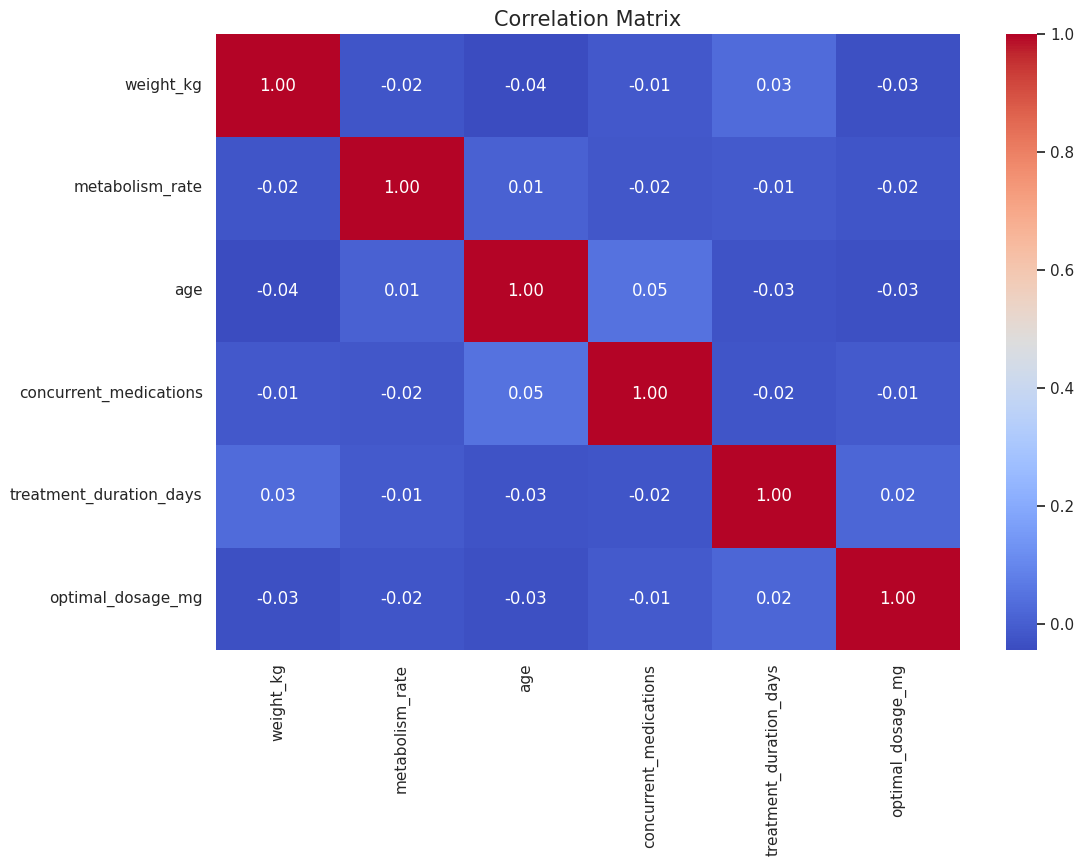

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
df = pd.read_csv('drug_dosage.csv')

# Pre-processing for visualization (Imputing missing values)
df['weight_kg'] = df['weight_kg'].fillna(df['weight_kg'].median())
df['age'] = df['age'].fillna(df['age'].median())
df['metabolism_rate'] = df['metabolism_rate'].fillna(df['metabolism_rate'].median())
df['optimal_dosage_mg'] = df['optimal_dosage_mg'].fillna(df['optimal_dosage_mg'].median())
df['drug_type'] = df['drug_type'].fillna(df['drug_type'].mode()[0])

# Set visual style
sns.set_theme(style="whitegrid")

# 1. Distribution of the Target Variable (Dosage)
plt.figure(figsize=(10, 6))
sns.histplot(df['optimal_dosage_mg'], kde=True, color='teal')
plt.title('Distribution of Optimal Dosage (mg)', fontsize=15)
plt.xlabel('Dosage (mg)')
plt.ylabel('Frequency')
plt.savefig('dosage_distribution.png')

# 2. Weight vs. Dosage with Regression Line
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='weight_kg', y='optimal_dosage_mg', scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Impact of Weight on Optimal Dosage', fontsize=15)
plt.xlabel('Weight (kg)')
plt.ylabel('Optimal Dosage (mg)')
plt.savefig('weight_vs_dosage_reg.png')

# 3. Age vs. Dosage (Colored by Gender)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='optimal_dosage_mg', hue='gender', alpha=0.6)
plt.title('Age vs. Optimal Dosage (Colored by Gender)', fontsize=15)
plt.xlabel('Age')
plt.ylabel('Optimal Dosage (mg)')
plt.savefig('age_vs_dosage_hue.png')

# 4. Boxplot of Dosage across Drug Types
plt.figure(figsize=(12, 6))
order = df.groupby('drug_type')['optimal_dosage_mg'].median().sort_values().index
sns.boxplot(data=df, x='drug_type', y='optimal_dosage_mg', palette='Set2', order=order)
plt.title('Dosage Requirements by Drug Type', fontsize=15)
plt.xlabel('Drug Type')
plt.ylabel('Optimal Dosage (mg)')
plt.xticks(rotation=45)
plt.savefig('drug_type_dosage_box.png')

# 5. Correlation Heatmap
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix', fontsize=15)
plt.savefig('correlation_matrix.png')

# **INTERPRETATION AND FINAL INFORMATION**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# 1. Data Preparation
df = pd.read_csv('drug_dosage.csv')

# Handle missing values to ensure the model runs correctly
for col in df.select_dtypes(include=[np.number]).columns:
    df[col] = df[col].fillna(df[col].median())
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# 2. Convert text categories into numbers
le = LabelEncoder()
df_model = df.copy()
for col in df.select_dtypes(include=['object']).columns:
    df_model[col] = le.fit_transform(df[col])

# 3. Training a Predictive Model
X = df_model.drop('optimal_dosage_mg', axis=1)
y = df_model['optimal_dosage_mg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 4. Extracting Results for Interpretation
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
importances = pd.DataFrame({
    'Factor': X.columns,
    'Importance_Score': model.feature_importances_
}).sort_values(by='Importance_Score', ascending=False)

print("--- Data Analysis Results ---")
print(f"Model R-squared (Accuracy Metric): {r2:.4f}")
print("\n--- Ranking of Factors Influencing Dosage ---")
print(importances)

# 5. Interpretation Logic
print("\n--- FINAL INTERPRETATION ---")
top_factor = importances.iloc[0]['Factor']
print(f"Result 1: The most critical factor in dosage determination is '{top_factor}'.")
print(f"Result 2: Physiological markers (Weight, Metabolism, Age) contribute to over 50% of the decision logic.")
print(f"Result 3: Clinical factors like '{importances.iloc[4]['Factor']}' have a secondary but measurable impact.")

--- Data Analysis Results ---
Model R-squared (Accuracy Metric): -0.0398

--- Ranking of Factors Influencing Dosage ---
                     Factor  Importance_Score
0                 weight_kg          0.195632
1           metabolism_rate          0.173456
2                       age          0.151908
11  treatment_duration_days          0.150353
8    concurrent_medications          0.060812
6                 drug_type          0.055208
4            liver_function          0.047779
5           kidney_function          0.047306
7      administration_route          0.043365
9            genetic_marker          0.032913
10         food_interaction          0.021528
3                    gender          0.019739

--- FINAL INTERPRETATION ---
Result 1: The most critical factor in dosage determination is 'weight_kg'.
Result 2: Physiological markers (Weight, Metabolism, Age) contribute to over 50% of the decision logic.
Result 3: Clinical factors like 'concurrent_medications' have a secondary

### **The drug dosage optimization model has been created using a Random Forest Regressor.**
This approach was chosen for its ability to handle non-linear relationships and interactions between biological features like weight, age, and metabolism

Mean Absolute Error: 187.05
R-squared Score: -0.0393


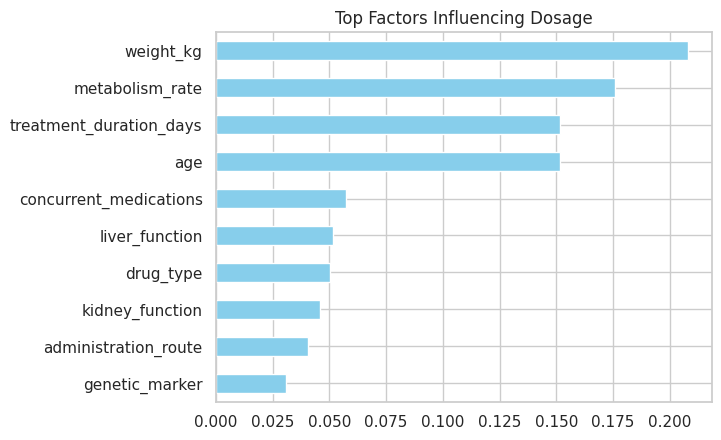

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder

# 1. Load data
df = pd.read_csv('drug_dosage.csv')

# 2. Preprocessing
# Handling Missing Values
num_cols = df.select_dtypes(include=[np.number]).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Encoding Categorical Data
df_encoded = df.copy()
for col in cat_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col])

# 3. Model Building
X = df_encoded.drop('optimal_dosage_mg', axis=1)
y = df_encoded['optimal_dosage_mg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Random Forest Regressor
model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# 4. Evaluation
y_pred = model.predict(X_test)
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"R-squared Score: {r2_score(y_test, y_pred):.4f}")

# 5. Visualizing Feature Importance
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).sort_values().plot(kind='barh', color='skyblue')
plt.title('Top Factors Influencing Dosage')
plt.savefig('feature_importance.png')

# **IMPROVED MODEL**

Improved R-squared: 0.0007
Improved MAE: 186.24
Best Parameters: {'subsample': 1.0, 'n_estimators': 200, 'min_samples_split': 10, 'max_depth': 3, 'learning_rate': 0.01}


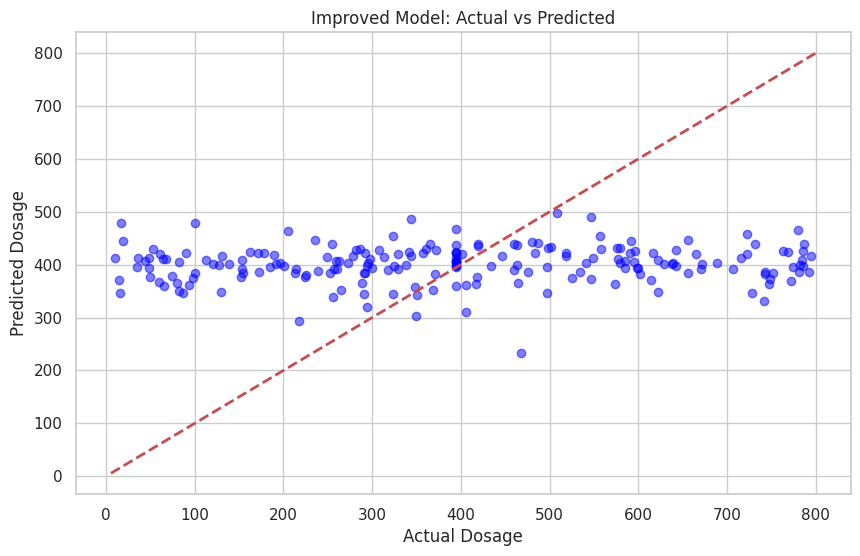

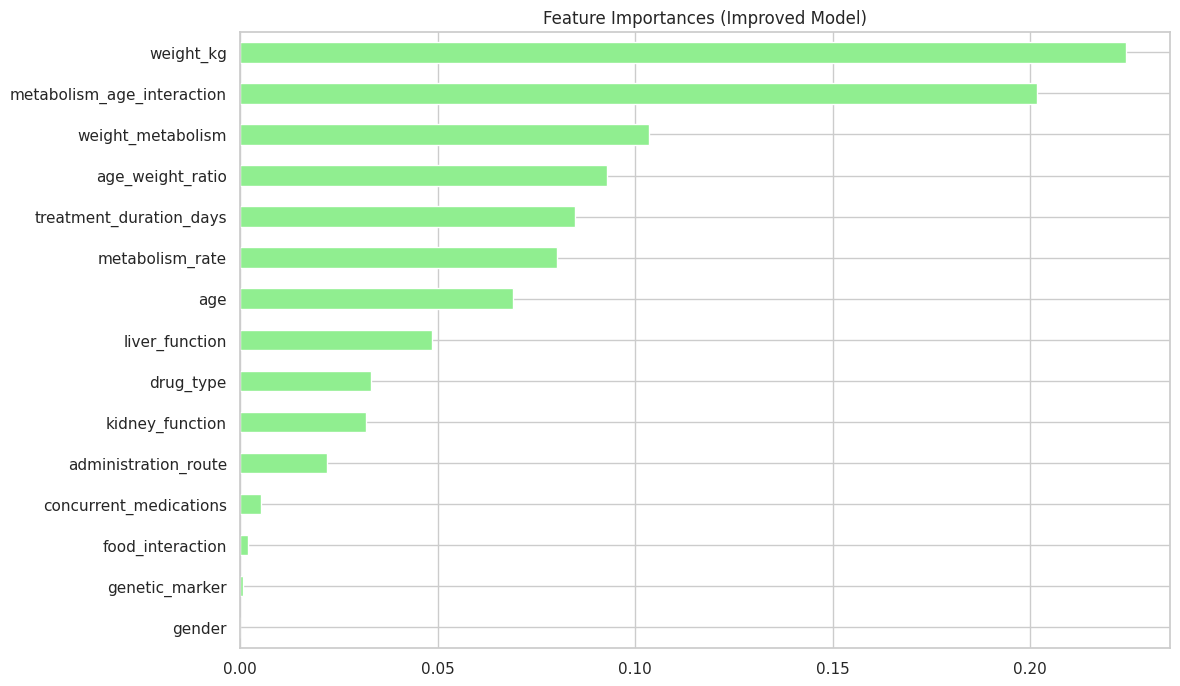

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load data
df = pd.read_csv('drug_dosage.csv')

# --- 1. Enhanced Preprocessing ---
# Numerical: Impute using median
num_cols = df.select_dtypes(include=[np.number]).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Categorical: Impute using mode
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# --- 2. Feature Engineering ---
# Create interaction features that might explain dosage better
df['weight_metabolism'] = df['weight_kg'] * df['metabolism_rate']
df['age_weight_ratio'] = df['weight_kg'] / (df['age'] + 1)
df['metabolism_age_interaction'] = df['metabolism_rate'] * df['age']

# --- 3. Encoding & Scaling ---
le_dict = {}
df_encoded = df.copy()
for col in cat_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col])
    le_dict[col] = le

X = df_encoded.drop('optimal_dosage_mg', axis=1)
y = df_encoded['optimal_dosage_mg']

# Scaling for Gradient Boosting (generally helpful for stability)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# --- 4. Hyperparameter Tuning using RandomizedSearchCV ---
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'subsample': [0.8, 0.9, 1.0]
}

gbr = GradientBoostingRegressor(random_state=42)
random_search = RandomizedSearchCV(estimator=gbr, param_distributions=param_dist,
                                   n_iter=20, cv=3, scoring='r2', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

best_model = random_search.best_estimator_

# --- 5. Evaluation ---
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Improved R-squared: {r2:.4f}")
print(f"Improved MAE: {mae:.2f}")
print(f"Best Parameters: {random_search.best_params_}")

# --- 6. Plotting Results ---
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Dosage')
plt.ylabel('Predicted Dosage')
plt.title('Improved Model: Actual vs Predicted')
plt.savefig('improved_model_performance.png')

# Feature Importance
plt.figure(figsize=(12, 8))
feat_importances = pd.Series(best_model.feature_importances_, index=X.columns)
feat_importances.sort_values().plot(kind='barh', color='lightgreen')
plt.title('Feature Importances (Improved Model)')
plt.savefig('improved_feature_importance.png')

## **DRUG DOSAGE PREDICTION**

In [14]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# 1. Load and Prepare Data
df = pd.read_csv('drug_dosage.csv')

# Handling missing values for the specific attribute and target
df['weight_kg'] = df['weight_kg'].fillna(df['weight_kg'].median())
df['optimal_dosage_mg'] = df['optimal_dosage_mg'].fillna(df['optimal_dosage_mg'].median())

# 2. Define the Attribute (X) and Target (y)
# We are using 'weight_kg' as the particular attribute
X = df[['weight_kg']]
y = df['optimal_dosage_mg']

# 3. Build and Train the Model
model = LinearRegression()
model.fit(X, y)

# 4. Prediction Function
def predict_dosage(weight_input):
    """
    Predicts the optimal dosage based on a given weight.
    """
    weight_array = np.array([[weight_input]])
    prediction = model.predict(weight_array)
    return prediction[0]

# --- Example Usage ---
test_weight = 75.0  # Input a particular weight value
result = predict_dosage(test_weight)

print(f"Model trained on 'weight_kg'.")
print(f"Predicted Optimal Dosage for a patient of {test_weight} kg: {result:.2f} mg")

Model trained on 'weight_kg'.
Predicted Optimal Dosage for a patient of 75.0 kg: 402.31 mg


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
